# Case Study - ENRON

In this notebook we highlight a particular dataset, namely the ENRON email dataset.
Our aim is to showcase the new observables created for annotated hypergraphs and to highlight the effect of the null model.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
# import matplotlib.pyplot as plt
# %matplotlib inline
import ternary

from ahyper import AnnotatedHypergraph

In [11]:
A = AnnotatedHypergraph.from_incidence('enron', 
                                       relabel_roles=True,
                                       add_metadata=True,
                                       root='../data/')
A.assign_role_interaction_matrix(np.array([[0,1,0.25],[0,0,0],[0,0,0]]))
G = A.to_weighted_projection(use_networkx=True)

## Features

### Graph

In [20]:
# TO DO: Create a snapshot of the network where nodes are pie charts of their roles.
import graph_tool

ModuleNotFoundError: No module named 'graph_tool'

### Node Role Density and Neighbourhood Role Density

In [3]:
# TODO: Ternary plot? Local density v null models, local density v node role participation
# TODO: Calculate distance between node role and local neighbourhood?

In [4]:
!pip install python-ternary --user --quiet
!pip install seaborn --user --quiet

In [5]:
import ternary
import seaborn as sns

In [6]:
from ahyper.observables import local_role_density, node_role_participation

In [12]:
local_role_den = pd.DataFrame(local_role_density(A)).T
node_role_par = pd.DataFrame(node_role_participation(A)).T

In [121]:
local_role_den.columns, node_role_par.columns

(Index(['cc', 'from', 'to'], dtype='object'),
 Index(['cc', 'from', 'to'], dtype='object'))

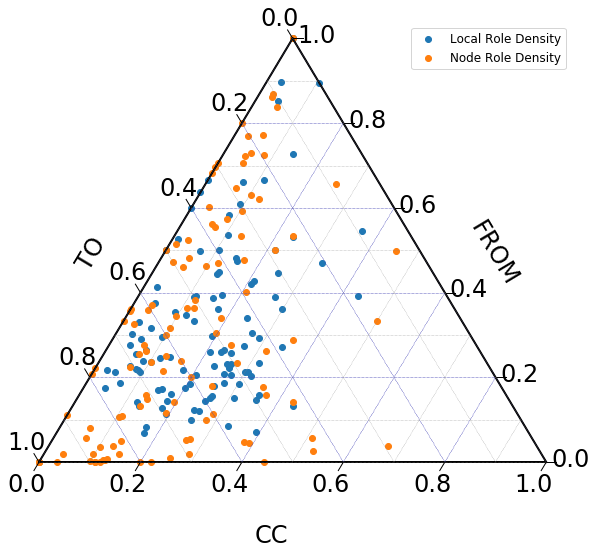

In [14]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)

tax.scatter(local_role_den.values, marker='o', color='C0', label="Local Role Density")
tax.scatter(node_role_par.values, marker='o', color='C1', label="Node Role Density")

# tax.scatter([test_point], color='r')

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.2, color="blue")

tax.ticks(ticks=[0,0.2,0.4,0.6,0.8,1], axis='lbr', linewidth=1, 
          tick_formats='%.1f', 
          fontsize=24,
          offset=0.02)
tax.left_axis_label("TO", offset=0.15, fontsize=24)
tax.right_axis_label("FROM", offset=0.15, fontsize=24)
tax.bottom_axis_label("CC", offset=0.15, fontsize=24)

fontsize = 12
offset = 0.2
# tax.top_corner_label("TO", fontsize=fontsize, offset=0.2)
# tax.left_corner_label("CC", fontsize=fontsize, offset=offset)
# tax.right_corner_label("FROM", fontsize=fontsize, offset=offset)


tax.legend(fontsize=fontsize)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.1, color="gray")
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.ax.axis('off');

fig.savefig('../fig/roles_local_v_node.png', bbox_inches='tight')

In [27]:
lines = list(zip(local_role_den.index, local_role_den.values, node_role_par.values))

def size(line):
    index,x,y = line
    return ((x-y)**2).sum()

lines.sort(key=lambda x: size(x), reverse=True)

In [21]:
names = pd.read_csv('../data/enron/enron_jobs.csv', index_col='node_id')

In [112]:
names.job.value_counts()

Employee           20
Vice President     14
Manager             9
Director            8
CEO                 4
Trader              4
President           3
In House Lawyer     1
Name: job, dtype: int64

In [117]:
# [names.loc[x] for x,_,_ in lines[:5]]
ids = names.query('job=="President"').index
focus = [l for l in lines if l[0] in ids]

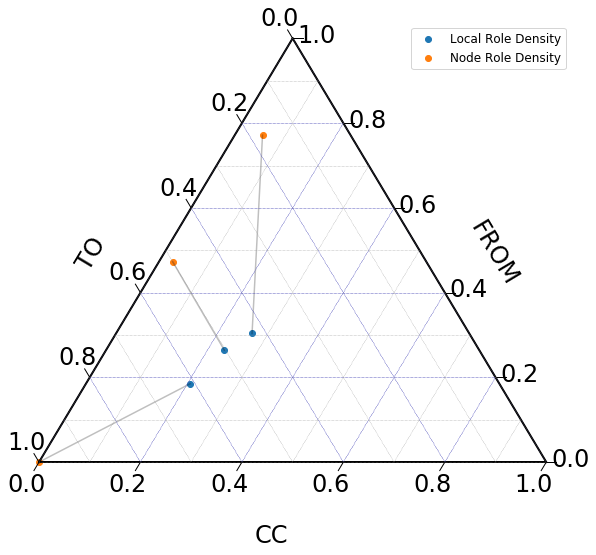

In [118]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)

# tax.scatter(node_role_par.values, marker='o', color='C1', label="Node Role Density")
fontsize = 12
offset = 0.2


first=True
for line in focus:
    
    tax.plot(line[1:], color='k', alpha=0.25)
    lr = tax.scatter([line[1]], marker='o', color='C0', label="Local Role Density")
    nr = tax.scatter([line[2]], marker='o', color='C1', label="Node Role Density")

    if first:
        tax.legend(fontsize=fontsize)
        first=False
        
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.2, color="blue")

tax.ticks(ticks=[0,0.2,0.4,0.6,0.8,1], axis='lbr', linewidth=1, 
          tick_formats='%.1f', 
          fontsize=24,
          offset=0.02)
tax.left_axis_label("TO", offset=0.15, fontsize=24)
tax.right_axis_label("FROM", offset=0.15, fontsize=24)
tax.bottom_axis_label("CC", offset=0.15, fontsize=24)

# tax.top_corner_label("TO", fontsize=fontsize, offset=0.2)
# tax.left_corner_label("CC", fontsize=fontsize, offset=offset)
# tax.right_corner_label("FROM", fontsize=fontsize, offset=offset)

# lr.set_label('Local')
# ls = [lr,nr]

# tax.legend(ls, fontsize=fontsize)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.1, color="gray")
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.ax.axis('off');

fig.savefig('../fig/roles_assortativity.png', bbox_inches='tight')

In [122]:
focus, local_role_den.columns

([(40,
   array([0.26821192, 0.30353201, 0.42825607]),
   array([0.05479452, 0.7716895 , 0.17351598])),
  (101, array([0.20547945, 0.18493151, 0.60958904]), array([0., 0., 1.])),
  (28,
   array([0.23327616, 0.26415094, 0.5025729 ]),
   array([0.02702703, 0.47297297, 0.5       ]))],
 Index(['cc', 'from', 'to'], dtype='object'))

In [42]:
A._degeneracy_avoiding_MCMC(n_steps=len(A.IL)*100, role_labels=True)
local_role_den_rp = pd.DataFrame(local_role_density(A)).T

A._degeneracy_avoiding_MCMC(n_steps=len(A.IL)*100, role_labels=False)
local_role_den_rd = pd.DataFrame(local_role_density(A)).T

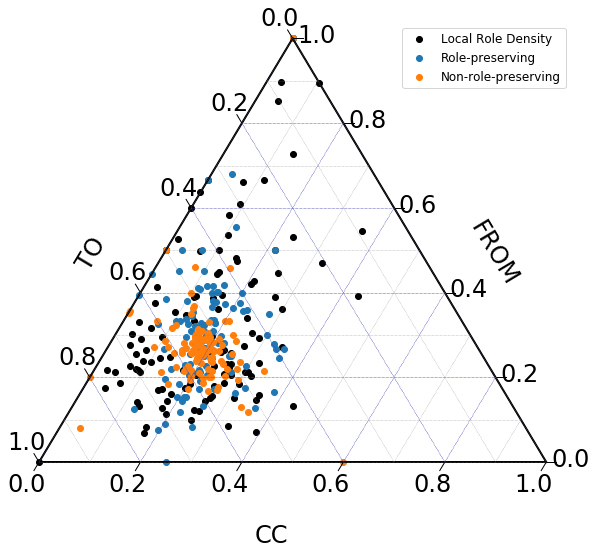

In [60]:
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)

tax.scatter(local_role_den.values, marker='o', color='black', label="Local Role Density")
tax.scatter(local_role_den_rp.values, marker='o', color='C0', label="Role-preserving")
tax.scatter(local_role_den_rd.values, marker='o', color='C1', label="Non-role-preserving")

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.2, color="blue")

tax.ticks(ticks=[0,0.2,0.4,0.6,0.8,1], axis='lbr', linewidth=1, 
          tick_formats='%.1f', 
          fontsize=24,
          offset=0.02)
tax.left_axis_label("TO", offset=0.15, fontsize=24)
tax.right_axis_label("FROM", offset=0.15, fontsize=24)
tax.bottom_axis_label("CC", offset=0.15, fontsize=24)

fontsize = 12
offset = 0.2
# tax.top_corner_label("TO", fontsize=fontsize, offset=0.2)
# tax.left_corner_label("CC", fontsize=fontsize, offset=offset)
# tax.right_corner_label("FROM", fontsize=fontsize, offset=offset)


tax.legend(fontsize=fontsize)
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.1, color="gray")
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.ax.axis('off');

fig.savefig('../fig/roles_null_model.png', bbox_inches='tight')

### Role Assortativity

In [45]:
def read_results(path):
    """Read results from a directory."""
    
    original = pd.read_csv(f'{path}/original.csv', index_col=0, header=None)[1]
    role_preserving_ensemble = pd.read_csv(f'{path}/role_preserving_ensemble.csv', index_col=False, header=0)
    role_destroying_ensemble = pd.read_csv(f'{path}/role_destroying_ensemble.csv', index_col=False, header=0)

    return original, role_preserving_ensemble, role_destroying_ensemble

In [46]:
original, preserving_ensemble, destroying_ensemble = read_results('../results/enron_r/')
results = read_results('../results/enron_r')

In [43]:
!pip install seaborn --user --quiet
import seaborn as sns

In [58]:
assort_features = [f for f in original.index if 'assortativity' in f]

og = original[assort_features]
og = pd.DataFrame(og).T
pe = preserving_ensemble[assort_features]
de = destroying_ensemble[assort_features]

In [107]:
combined = pd.concat([og,pe,de],keys=['original','preserving','destroying'], names=['ensemble','sample'])

In [108]:
combined = combined.stack()
combined.index.names = ['ensemble','sample','feature']

In [109]:
combined = combined.reset_index()
combined.feature = combined.feature.apply(lambda x: '-'.join(x.split('_')[1:]))

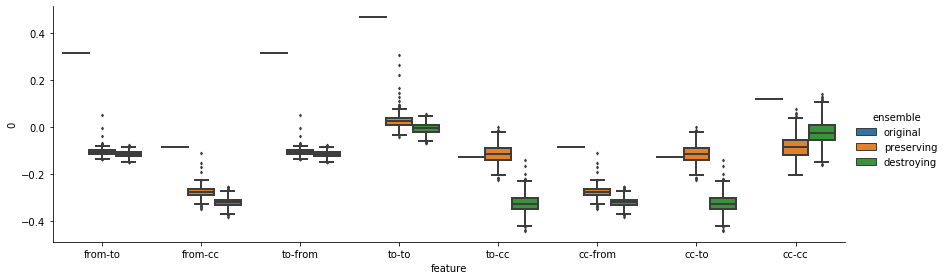

In [110]:
sns.catplot(data=combined,
            kind='box',
            hue='ensemble',
            x='feature',
            y=0,
            linewidth=2,
            fliersize=2,
            notch=False,
            height=4, 
            aspect=3)

In [63]:
max([e.eid for e in A.IL])

10503

In [64]:
# Seems to work fine with singletons and degeneracies.
assort = assortativity(A, n_samples=1000000, by_role=True, spearman=True)

In [3]:
from ahyper.observables import _assortativity

In [5]:
assort = _assortativity(A, n_samples=100000, by_role=True, spearman=True)

In [7]:
isinstance(assort, dict)

True

### Hypergraph PageRank

In [ ]:
# TODO

### Weighted Projection

In [12]:
G = A.to_weighted_projection(use_networkx=True)

In [19]:
from ahyper.observables import _degree_centrality, _eigenvector_centrality

In [16]:
degree = pd.Series(_degree_centrality(G))

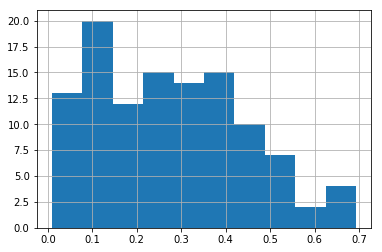

In [18]:
degree.hist();

In [21]:
eigenvector = pd.Series(_eigenvector_centrality(G))

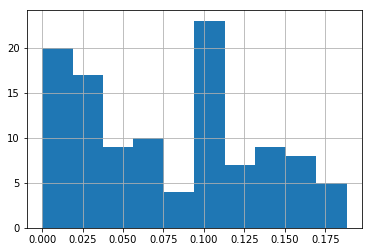

In [22]:
eigenvector.hist();

## Null Models

In [8]:
# Master file is in ensemble_study.ipynb (until added to package).

def read_results(path):
    """Read results from a directory."""
    
    original = pd.Series.from_csv(f'{path}/original.csv', index_col=0, header=None)
    role_preserving_ensemble = pd.read_csv(f'{path}/role_preserving_ensemble.csv', index_col=False, header=0)
    role_destroying_ensemble = pd.read_csv(f'{path}/role_destroying_ensemble.csv', index_col=False, header=0)

    return original, role_preserving_ensemble, role_destroying_ensemble

def get_min_max(a, b):
    """Get bounds for two series"""

    lower = min(a.min(), b.min())
    upper = max(a.max(), b.max())
    
    return lower, upper
    
def plot_feature(feature, original, role_preserving_ensemble, role_destroying_ensemble, num_bins=20, **fig_kwargs):
    """Plot a feature"""
    
    fig = plt.figure(**fig_kwargs)
    ax = fig.add_subplot(111)

    ymax=0
    
    lower, upper = get_min_max(role_preserving_ensemble[feature],role_destroying_ensemble[feature])
    bins = np.linspace(lower, upper, num_bins)
        
    y,binEdges=np.histogram(role_preserving_ensemble[feature], bins=bins)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    rp = ax.plot(bincenters,y,'-o', color='r', label='Role Preserving Ensemble')
    
    ymax=max(ymax,max(y))
    
    y,binEdges=np.histogram(role_destroying_ensemble[feature], bins=bins)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    rd = ax.plot(bincenters,y,'-o', color='b', label='Role Destroying Ensemble')
    
    ymax=max(ymax,max(y))
        
    line = ax.vlines(original[feature],0.0,ymax, label='Data')
    
    ax.legend(loc='best')
    ax.set_title(feature)
    
    return fig, ax, (line, rp, rd)

In [9]:
results = read_results('../results/enron_full')

/usr/lib/python3.7/site-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


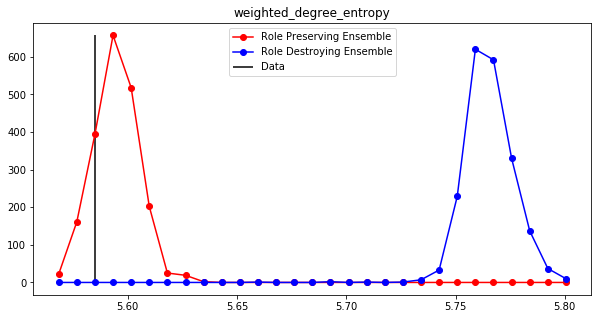

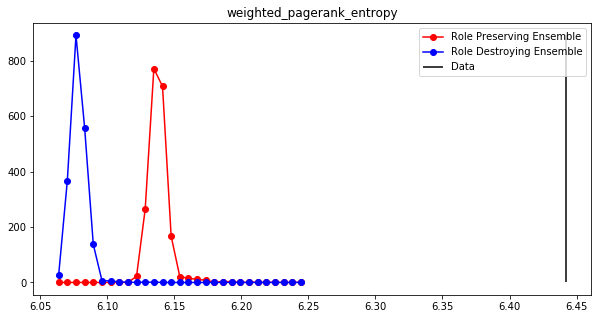

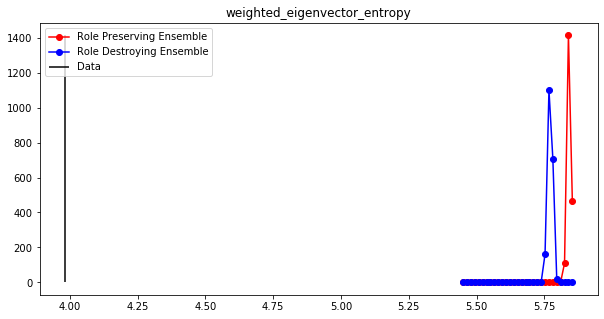

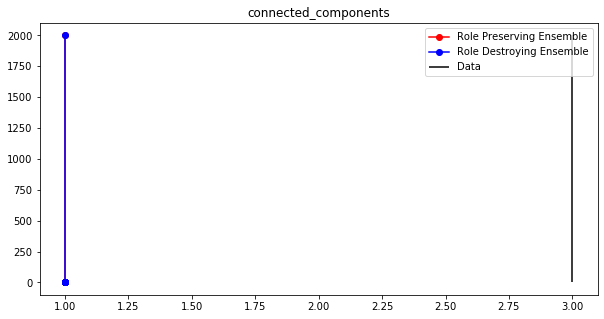

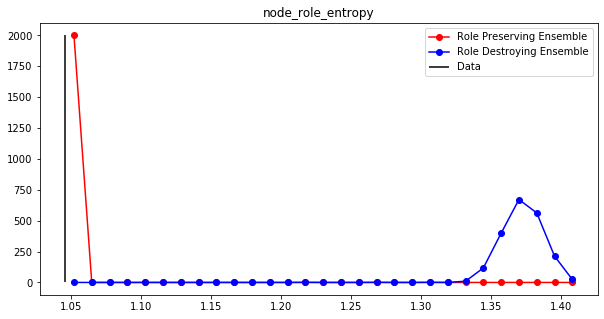

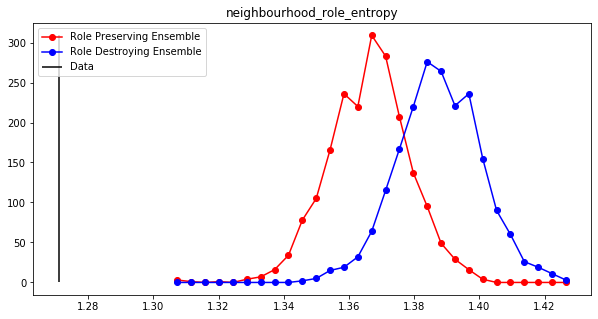

In [11]:
import matplotlib.pyplot as plt
for feature in results[0].index:
    plot_feature(feature, *results, num_bins=30, figsize=(10,5))